## Problem Statement

A private bank had run a marketing campaign in the past, making sales calls for a term deposit. Whether a prospect had taken the term deposit or not is mentioned in the data as response variable. Basing on the past data, as an analyst we need to reduce the marketing cost compared to random calling for all the customers.Predicting whether a customer will take term deposit or not.

## About the Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.

### Attributes Descriptions

1) age (numeric)

2) job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3) marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4) education: (categorical: primary, secondary, tertiary and unknown)

5) default: has credit in default? (categorical: 'no','yes','unknown')


6) housing: has housing loan? (categorical: 'no','yes','unknown')

7) loan: has personal loan? (categorical: 'no','yes')

8) balance: Balance of the individual.


9) contact: contact communication type (categorical: 'cellular','telephone','unkown')


10) month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11) day: last contact day of the month (numeric: 1,2,3,....29,30)

12) duration: last contact duration, in seconds (numeric). 

13) campaign: number of contacts performed during this campaign and for this client (numeric)

14) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric;)

15) previous: number of contacts performed before this campaign and for this client (numeric)

16) poutcome: outcome of the previous marketing campaign (categorical: 'failure','unknown','success','others')

17) deposit - has the client subscribed a term deposit? (binary: 'yes','no')

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Dell\\Desktop\\bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.shape

(11162, 17)

In [10]:
df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   age        int64 
 1   job        object
 2   marital    object
 3   education  object
 4   default    object
 5   balance    int64 
 6   housing    object
 7   loan       object
 8   contact    object
 9   day        int64 
 10  month      object
 11  duration   int64 
 12  campaign   int64 
 13  pdays      int64 
 14  previous   int64 
 15  poutcome   object
 16  deposit    object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

-> There are NO missing values

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


-> The mean age of customers is approximately 41 years 

-> The mean balance is 1528 with standard deviation of 3225 which is very big saying that the distribution is wider

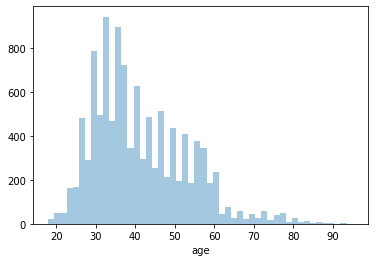

In [14]:
sns.distplot(df['age'],kde=False)

-> Most of the customers belongs to the age group between 20-50

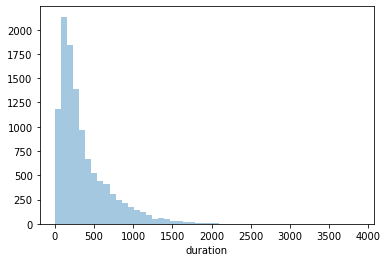

In [13]:
sns.distplot(df.duration,kde=False)

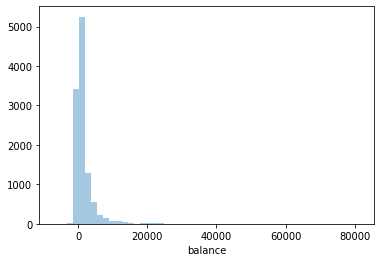

In [20]:
sns.distplot(df.balance,kde=False)

-> Both duration and balance have been skewed distribution indicating that there are outliers in the data.

-> we will now check the distributions with people taking term deposit and people who doesn't take deposit

In [22]:
# checking for the promoted and non promoted people for this avg_triaing_score
no_depo= df[df["deposit"]=="no"]
depo= df[df["deposit"]=="yes"]

In [23]:
depo.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [24]:
no_depo.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5289,57,retired,single,primary,no,604,no,no,cellular,19,nov,187,1,-1,0,unknown,no
5290,45,admin.,divorced,secondary,no,0,yes,no,cellular,17,nov,102,1,-1,0,unknown,no
5291,48,blue-collar,married,secondary,no,238,yes,yes,cellular,2,jun,118,2,81,1,success,no
5292,34,admin.,single,secondary,no,673,yes,no,cellular,29,jan,89,1,260,2,failure,no
5293,37,entrepreneur,married,tertiary,no,7944,no,no,cellular,21,nov,102,1,-1,0,unknown,no


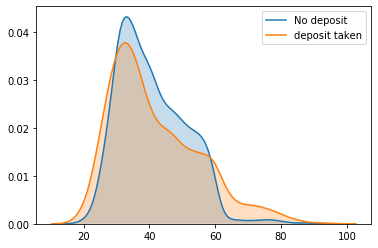

In [29]:
sns.kdeplot(no_depo['age'],label='No deposit',shade=True)
sns.kdeplot(depo['age'],label = 'deposit taken',shade=True);

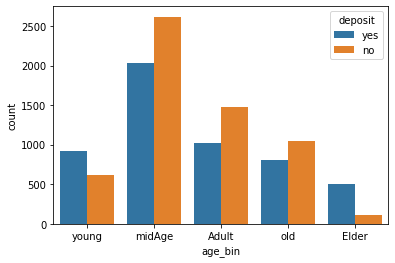

In [47]:
df["age_bin"]=pd.cut(df.age,bins=[18,29,40,50,60,100],labels=['young','midAge','Adult',"old",'Elder'])
sns.countplot(x="age_bin",data=df,hue="deposit")
plt.show()

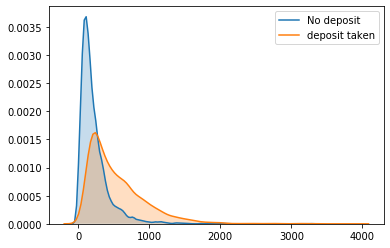

In [26]:
sns.kdeplot(no_depo['duration'],label='No deposit',shade=True)
sns.kdeplot(depo['duration'],label = 'deposit taken',shade=True);

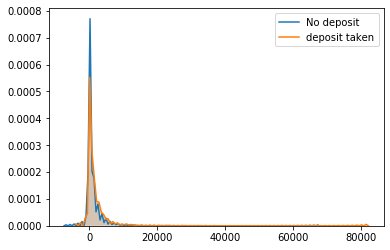

In [30]:
sns.kdeplot(no_depo['balance'],label='No deposit',shade=True)
sns.kdeplot(depo['balance'],label = 'deposit taken',shade=True);

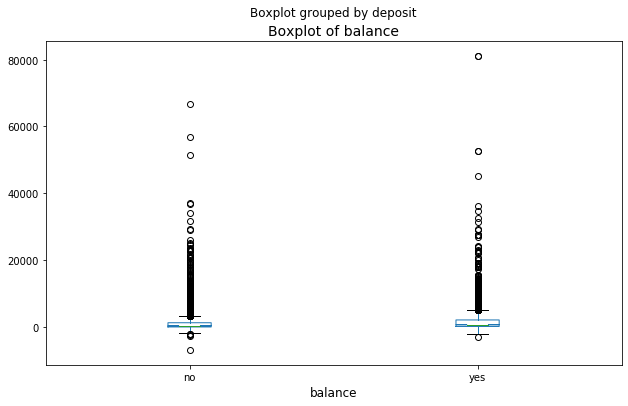

In [33]:
df.boxplot(column="balance",notch = True,  
             by="deposit",
            grid = False,   
            figsize =(10,6))   
plt.xlabel("balance",fontsize = 12)
plt.title("Boxplot of balance",fontsize = 14)
plt.show()

-> Age  seems to be a influencer towards taken term deposit where we can seethat people having age younger than 30 and from 60 to 80 tends to take the term deposit

-> Duration plays a crucial role as we can see from the above plots that people having duration more seems to take term deposit and this can be important factor 

-> Balance doesn't influence much in taking deposit

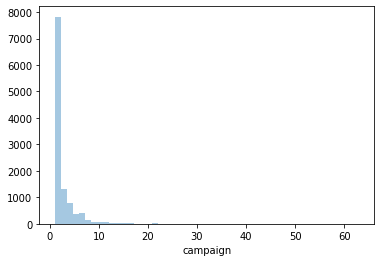

In [34]:
sns.distplot(df.campaign,kde=False)

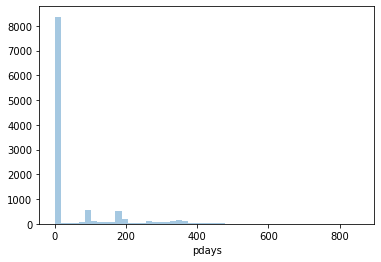

In [35]:
sns.distplot(df.pdays,kde=False)

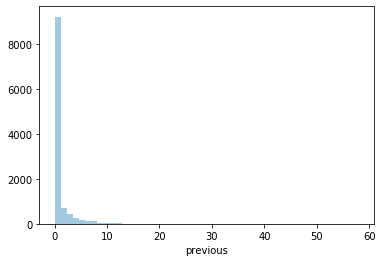

In [36]:
sns.distplot(df.previous,kde=False)

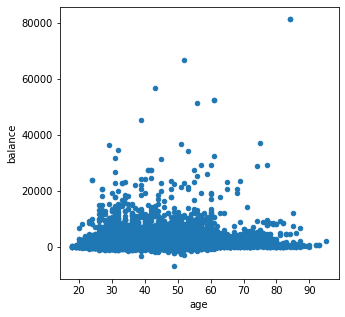

In [38]:
df.plot(kind="scatter",     
         x ="age",y ="balance",    
         figsize=(5,5)) 

-> just checking if there is any correlation between age and the balance but there is no correlation 

### Most of variables are categorical we will move to that\

In [39]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

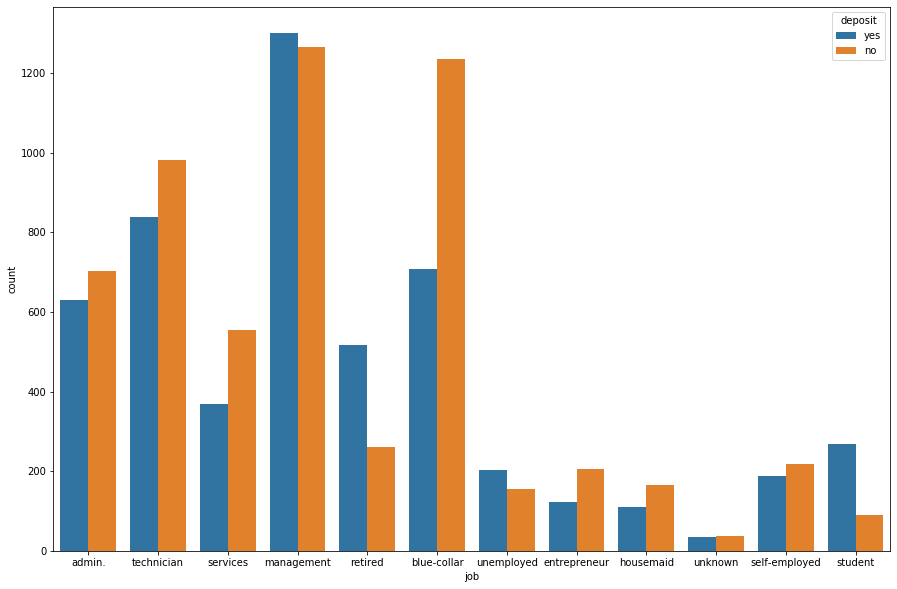

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(x="job",hue="deposit",data=df)
plt.show()

-> job type with student, retired, unemployed are more tend to take term deposit

In [41]:
df.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

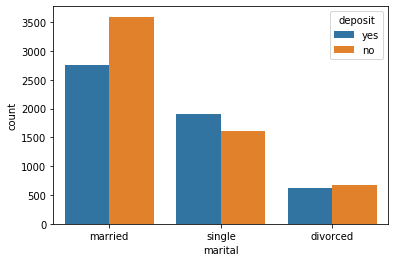

In [48]:
sns.countplot(x="marital",hue="deposit",data=df)

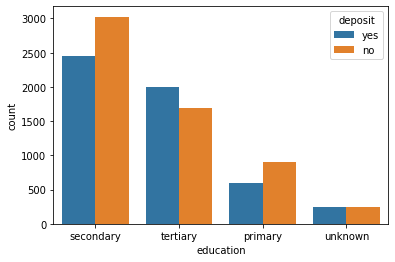

In [50]:
sns.countplot(x="education",hue="deposit",data=df)

-> single's marital status are more tend to take the term deposit and lowest one is married

-> Education with tertiray are more likely to take term deposit

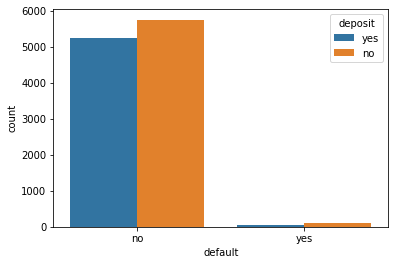

In [51]:
sns.countplot(x="default",hue="deposit",data=df)

-> Basically the default column will be treated as most important variable but here we can see that there is no relation for deposti

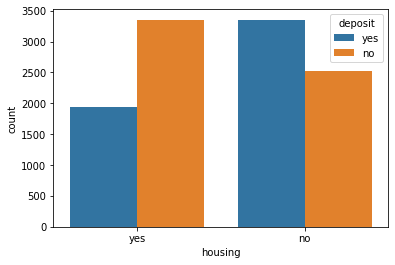

In [52]:
sns.countplot(x="housing",hue="deposit",data=df)

-> This seems to be more important because people having no housing loans are more tend to take the term deposit rather than people having the housing loan

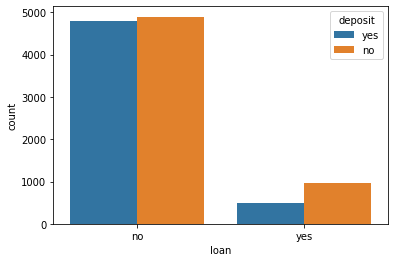

In [53]:
sns.countplot(x="loan",hue="deposit",data=df)

-> This column does not help much as there is no relation

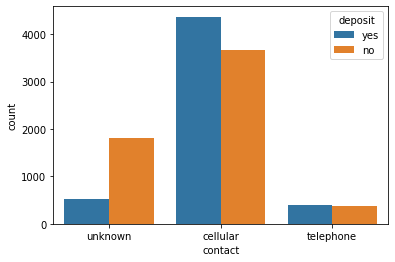

In [54]:
sns.countplot(x="contact",hue="deposit",data=df)

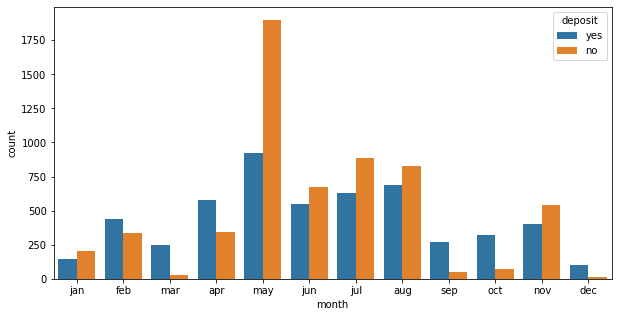

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x="month",hue="deposit",data=df,order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))
plt.show()

-> we can see a clear trend in months of jan,feb,mar,apr,sep,oct,dec are the months people are likely to take term deposit 

-> Here may be grouping can help to visualize the data in clear manner

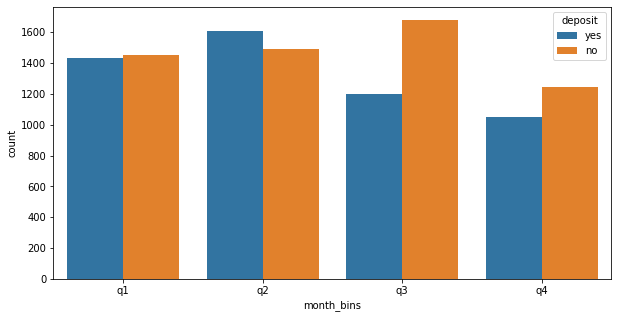

In [56]:
df["month_bins"]=pd.cut(df.day,bins=4,labels=["q1","q2","q3","q4"])
plt.figure(figsize=(10,5))
sns.countplot(x="month_bins",hue="deposit",data=df)
plt.show()

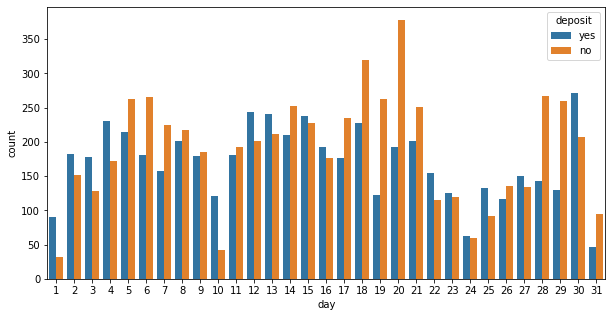

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x="day",hue="deposit",data=df)
plt.show()

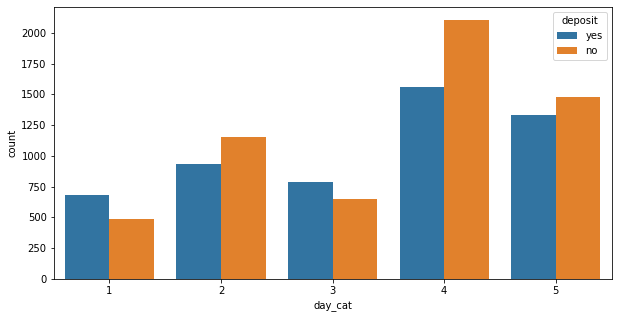

In [58]:
df["day_cat"] = np.nan
df.loc[df['day'] <5, 'day_cat'] = '1'
df.loc[(df['day'] >=5)&(df['day'] <=9), 'day_cat'] = '2'
df.loc[(df['day'] >=10)&(df['day'] <=13), 'day_cat'] = '3'
df.loc[(df['day'] >=14)&(df['day'] <=21), 'day_cat'] = '4'
df.loc[(df['day'] >=22), 'day_cat'] = '5'
plt.figure(figsize=(10,5))
sns.countplot(x="day_cat",hue="deposit",data=df)
plt.show()

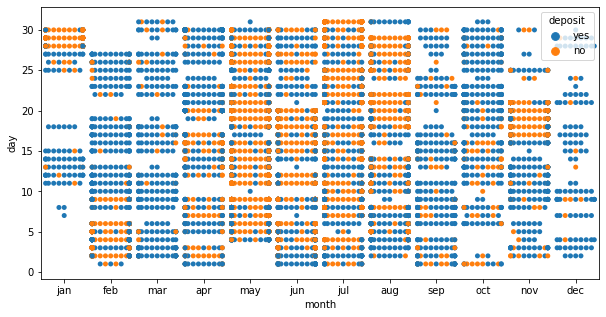

In [60]:
plt.figure(figsize=(10,5))
sns.swarmplot(x="month",y="day",hue="deposit",data=df,order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))
plt.show()

-> May be we can consider this as a better view because we can see a clear trend that people tend to take term deposit in the months and days

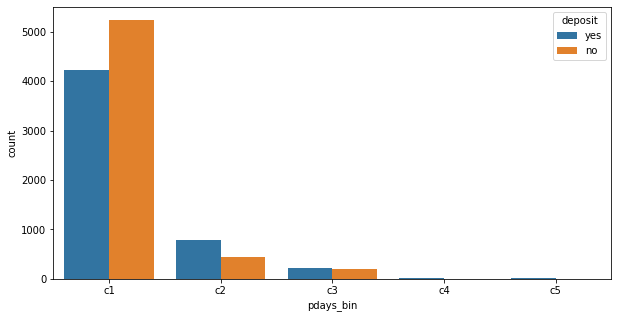

In [61]:
plt.figure(figsize=(10,5))
df["pdays_bin"]=pd.cut(df.pdays,bins=5,labels=["c1","c2","c3","c4","c5"])
sns.countplot(x="pdays_bin",hue="deposit",data=df)
plt.show()

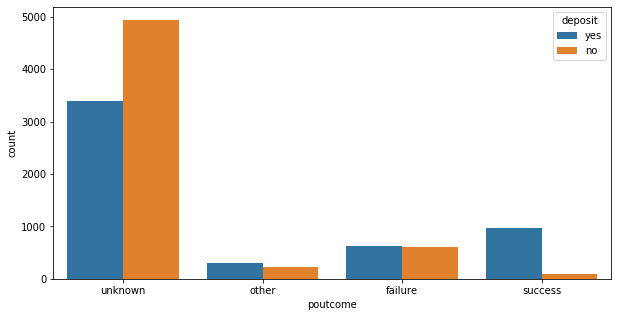

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(x="poutcome",hue="deposit",data=df)

In [72]:
df.groupby(["marital"])[["balance"]].describe()

balance                                                           \
           count         mean          std     min    25%    50%      75%   
marital                                                                     
divorced  1293.0  1371.835267  3178.803624 -2282.0   49.0  439.0  1612.00   
married   6351.0  1599.927570  3380.652168 -6847.0  122.0  580.0  1812.50   
single    3518.0  1457.255259  2940.061288 -1139.0  145.0  539.5  1583.75   

                   
              max  
marital            
divorced  52587.0  
married   81204.0  
single    56831.0

In [74]:
df.groupby(["housing"])[["balance"]].describe()

balance                                                          \
          count         mean          std     min    25%    50%     75%   
housing                                                                   
no       5881.0  1764.156266  3720.272528 -6847.0  159.0  633.0  2037.0   
yes      5281.0  1266.151108  2539.064030 -3058.0   88.0  465.0  1386.0   

                  
             max  
housing           
no       81204.0  
yes      45248.0

In [75]:
df.groupby(["loan"])[["balance"]].describe()

balance                                                                  
       count         mean          std     min    25%    50%      75%      max
loan                                                                          
no    9702.0  1634.372294  3334.793067 -2049.0  145.0  598.0  1849.25  81204.0
yes   1460.0   825.251370  2251.648104 -6847.0    8.0  292.0   913.75  51439.0

In [76]:
df.groupby(["deposit"])[["balance"]].describe()

balance                                                          \
          count         mean          std     min    25%    50%     75%   
deposit                                                                   
no       5873.0  1280.227141  2933.411934 -6847.0   64.0  414.0  1324.0   
yes      5289.0  1804.267915  3501.104777 -3058.0  210.0  733.0  2159.0   

                  
             max  
deposit           
no       66653.0  
yes      81204.0

In [77]:
df.groupby(["education"])[["balance"]].describe()

balance                                                           \
            count         mean          std     min    25%    50%      75%   
education                                                                    
primary    1500.0  1523.031333  3283.888725 -1489.0   80.5  472.0  1792.50   
secondary  5476.0  1296.480278  2901.555021 -1965.0  113.0  494.0  1436.25   
tertiary   3689.0  1845.869070  3598.763380 -6847.0  147.0  658.0  2155.00   
unknown     497.0  1746.605634  3299.007498 -1137.0  209.0  694.0  2193.00   

                    
               max  
education           
primary    66653.0  
secondary  81204.0  
tertiary   52587.0  
unknown    45248.0

## Findings and Recommendiations

1) People having loan and house loans have lesser account balance and people having lesser balance dont take term deposit, so banks should not focus on the people having previous loans

2) customers having age lesser than 30 and greater than 50 are more likely to take term deposit

3) customers having more duration are taking term deposits indicates that they are having more interaction with banks, so marketing team should more focus on the people having more duration 

4) Divorced has lesser bank balance and single's are more likely to take term deposit

5) job type with student, retired, unemployed are more tend to take term deposit

6) Customers are more willing to invest either before 8th or after 23rd of the month and especially in the months of jan,feb,mar,sep,oct and december

7) Balance is influenced by education

8) students and Retired people are more likely to take term deposit 